### Car Price Prediction <br>

Our Chaky Company makes cars. But, we have some difficulties in setting price for each car. We are going to set up a simple car price prediction model to set the car prices for us. 

In [1]:
# import required modules
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

### Importing dataset 

We will need to import our dataset to do some exploration, analysis, cleansing and scaling for our model development. First, we need to load our car dataset in a csv file format inside the data directory.  

We will perform some basics exploration and statical analysis after the dataset has been loaded.

In [2]:
# load the dataset
df = pd.read_csv('data/Cars.csv')

In [3]:
# check the first and last three rows
print("First three rows:")
print(df.head(3))
print("\nLast three rows:")
print(df.tail(3))

First three rows:
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   

                  torque  seats  
0         190Nm@ 2000rpm    5.0  
1    250Nm@ 1500-2500rpm    5.0  
2  12.7@ 2,700(kgm@ rpm)    5.0  

Last three rows:
                        name  year  selling_price  km_driven    fuel  \
8125  Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126         Tata Indigo CR4  2013         290000      25000  Diesel   
81

In [4]:
# check the no. of rows and columns in the dataset
df.shape

(8128, 13)

In [5]:
# check basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


There are 8128 rows and 13 columns in the dataset. The columns are as follows.

name - car brand name <br>
year - released year <br>
selling_price - price of the car <br>
km_driven - kilometer driven <br>
fuel - fuel type (Disel/ Patrol/ LPG/ CNG) <br>
seller_type - types of sellers (Individual/ Dealer/ Trustmark Dealer) <br>
transmission - the mechanical system that transmits (delivers) the engine’s power to the wheels (Manual/ Automatic) <br>
owner - owner of the car (1st/ 2nd/ 3rd/ 4th & above, Test Drive Car) <br>
mileage - how far a car can travel per unit of fuel <br>
engine - engine power <br>
max_power - maximum engine power <br>
torque - twisting force the engine generates to turn the wheels (we won't use this in our model) <br>
seats - no. of seats in the car

In [6]:
# simply describe the  statistical analytic of dataframe 
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


### Explanatory Data Analysis

In [7]:
# check for missing values in the dataframe
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

There are missing values in mileage, engine, maxpower, torque and seats columns. Before filling missing values, we will continue the analysis further.

In [8]:
# we have seen categorical columns earlier, let's explore them a bit
# extract the categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage',
       'engine', 'max_power', 'torque'],
      dtype='object')


In [9]:
# remove name , mileage (should be numerical), engine, max_power and torque from cat_cols
cat_cols = cat_cols.drop(['name', 'mileage', 'engine', 'max_power', 'torque'], errors='ignore')

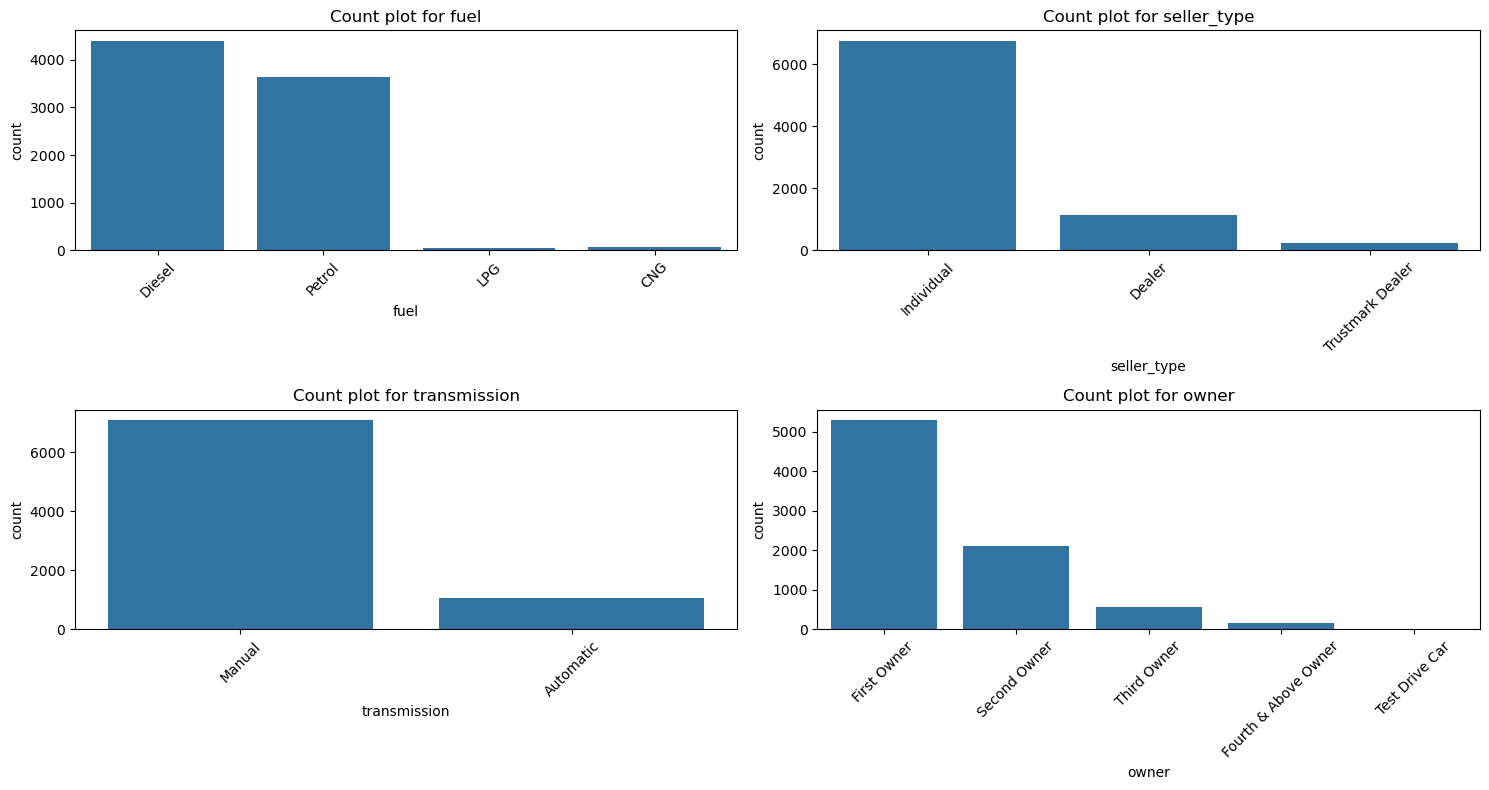

In [10]:
# Number of categorical columns
num_cols = len(cat_cols)


# Set up subplot grid
rows = (num_cols + 2) // 3
fig, axes = plt.subplots(rows, 2, figsize=(15, rows * 4))
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Count plot for {col}")
    axes[i].tick_params(axis="x", rotation=45)

# Remove unused subplot spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [11]:
# checking the selling price per owner
df.groupby('owner')['selling_price'].mean().sort_values()

owner
Fourth & Above Owner    2.258132e+05
Third Owner             2.840153e+05
Second Owner            3.929645e+05
First Owner             7.830864e+05
Test Drive Car          4.403800e+06
Name: selling_price, dtype: float64

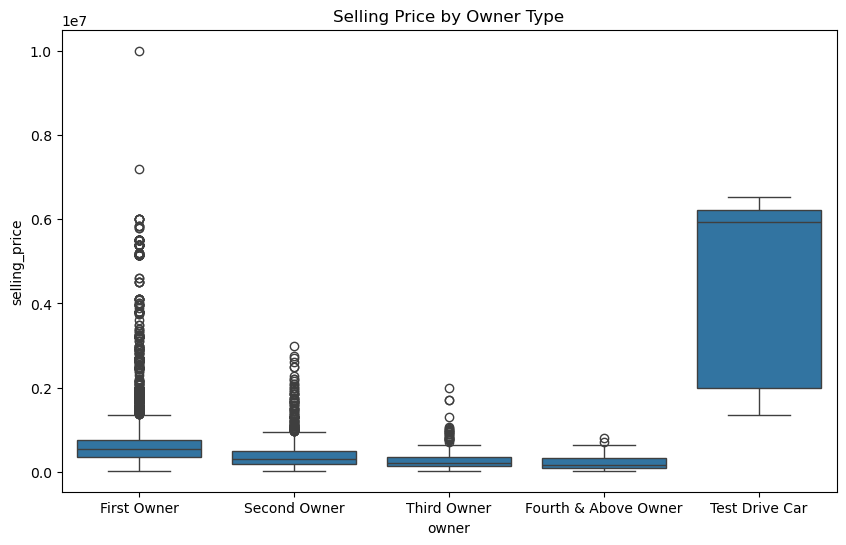

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='owner', y='selling_price', data=df)
plt.title("Selling Price by Owner Type")
plt.show()

Why test drive cars are more expensive than others. This is ridiculous. We need to remove these rows in the data cleansing step.

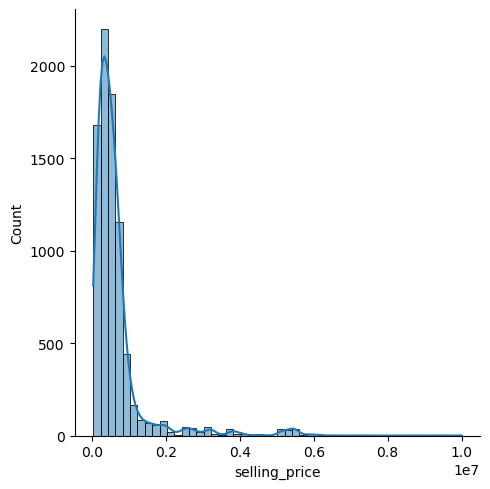

In [13]:
# check the distribution of the target data (selling_price)
sns.displot(df['selling_price'], bins=50, kde=True)
plt.show()

The target data distribution is right-skewed according to the displot. As you can see the price difference is also huge. We can observe that a lot of customers purchased our cheap cars. The more the price, the less we sell. We have to minimize the price difference later to get a good model prediction.


Findings
--------



milage, engine and max_power contains numbers and texts. They are currently strings. If we remove the text and transform into numerical values, they will become useful. 

The fuel type CNG and LPG contains only little and they used a different milage system. So, we should drop them. 

Test drive cars' prices are sky rocket. It is not very logical. Need to remove these rows.

Let's continue to Data Labeling and Data cleansing step.

### Data Labeling 

We want to map the owner columns as First owner to 1, ..., to Test Drive Car to 5.

In [14]:
# map owner values to numeric
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

df['owner'] = df['owner'].map(owner_mapping)

# check if mapping worked
print(df['owner'].unique())

[1 2 3 4 5]


### Data Cleansing

In [15]:
# reomve CNG and LPG 
df = df[~df['fuel'].isin(['CNG', 'LPG'])]

# check the unique values in fuel column
print(df['fuel'].value_counts(),end='\n\n')

# check the df again
print(df.head(3))

fuel
Diesel    4402
Petrol    3631
Name: count, dtype: int64

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   

  seller_type transmission  owner     mileage   engine   max_power  \
0  Individual       Manual      1   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual      2  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual      3   17.7 kmpl  1497 CC      78 bhp   

                  torque  seats  
0         190Nm@ 2000rpm    5.0  
1    250Nm@ 1500-2500rpm    5.0  
2  12.7@ 2,700(kgm@ rpm)    5.0  


In [16]:
# remove test drive cars now 5
df = df[df['owner'] != 5]

# check the owner column
print(df['owner'].unique(), end='\n\n')

# check the df again
print(df.head(3))

[1 2 3 4]

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   

  seller_type transmission  owner     mileage   engine   max_power  \
0  Individual       Manual      1   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual      2  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual      3   17.7 kmpl  1497 CC      78 bhp   

                  torque  seats  
0         190Nm@ 2000rpm    5.0  
1    250Nm@ 1500-2500rpm    5.0  
2  12.7@ 2,700(kgm@ rpm)    5.0  


Our company does not understand what torque really means. So, we decided to remove the entire "torque" column.

In [17]:
# drop torque
df = df.drop(columns=['torque'], axis=1)

# check
print("shape:",df.shape)
print("columns:",df.columns)

shape: (8028, 12)
columns: Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')


### Feature Engineering 


Some of our columns contain mixed data (number + text). We need to get rid of the text and make these columns as numeric.

In [18]:
# split the milage into milage and unit
df[["mileage", "unit"]] = df.mileage.str.split(" ",n=1, expand=True)

# convert mileage to numeric
df["mileage"] = pd.to_numeric(df['mileage'], errors='coerce')

# drop the unit column
df.drop(columns=["unit"], axis=1, inplace=True)

# check the dataframe
print(df.head(3))


                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   

  seller_type transmission  owner  mileage   engine   max_power  seats  
0  Individual       Manual      1    23.40  1248 CC      74 bhp    5.0  
1  Individual       Manual      2    21.14  1498 CC  103.52 bhp    5.0  
2  Individual       Manual      3    17.70  1497 CC      78 bhp    5.0  


In [19]:
# remove 'CC' from engine 
df["engine"] = df["engine"].str.replace(" CC", "", regex=False) # notice we use replace fun
# convert to float
df["engine"] = pd.to_numeric(df["engine"], errors="coerce")

# check the dataframe
print(df.head(3))

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   

  seller_type transmission  owner  mileage  engine   max_power  seats  
0  Individual       Manual      1    23.40  1248.0      74 bhp    5.0  
1  Individual       Manual      2    21.14  1498.0  103.52 bhp    5.0  
2  Individual       Manual      3    17.70  1497.0      78 bhp    5.0  


In [20]:
# same process for max_power
df["max_power"] = df["max_power"].str.replace(" bhp", "", regex=False)
df["max_power"] = pd.to_numeric(df["max_power"], errors="coerce")

print(df.head(3))

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   

  seller_type transmission  owner  mileage  engine  max_power  seats  
0  Individual       Manual      1    23.40  1248.0      74.00    5.0  
1  Individual       Manual      2    21.14  1498.0     103.52    5.0  
2  Individual       Manual      3    17.70  1497.0      78.00    5.0  


In [21]:
# we will take the first name of the brand as our brand name
df["name"] = df["name"].str.split(" ").str[0]
# print the dataframe
print(df.head(3))

     name  year  selling_price  km_driven    fuel seller_type transmission  \
0  Maruti  2014         450000     145500  Diesel  Individual       Manual   
1   Skoda  2014         370000     120000  Diesel  Individual       Manual   
2   Honda  2006         158000     140000  Petrol  Individual       Manual   

   owner  mileage  engine  max_power  seats  
0      1    23.40  1248.0      74.00    5.0  
1      2    21.14  1498.0     103.52    5.0  
2      3    17.70  1497.0      78.00    5.0  


### EDA Again

In [22]:
# check missing values
print(df.isnull().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
seats            214
dtype: int64


In [23]:
# I will fill all missing values with median of each column
df["mileage"].fillna(df["mileage"].median(), inplace=True)
df["engine"].fillna(df["engine"].median(), inplace=True)
df["max_power"].fillna(df["max_power"].median(), inplace=True)
df["seats"].fillna(df["seats"].median(), inplace=True)

In [24]:
# check missing values again
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


In [25]:
# print dataframe
print(df.head())

      name  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

   owner  mileage  engine  max_power  seats  
0      1    23.40  1248.0      74.00    5.0  
1      2    21.14  1498.0     103.52    5.0  
2      3    17.70  1497.0      78.00    5.0  
3      1    23.00  1396.0      90.00    5.0  
4      1    16.10  1298.0      88.20    5.0  


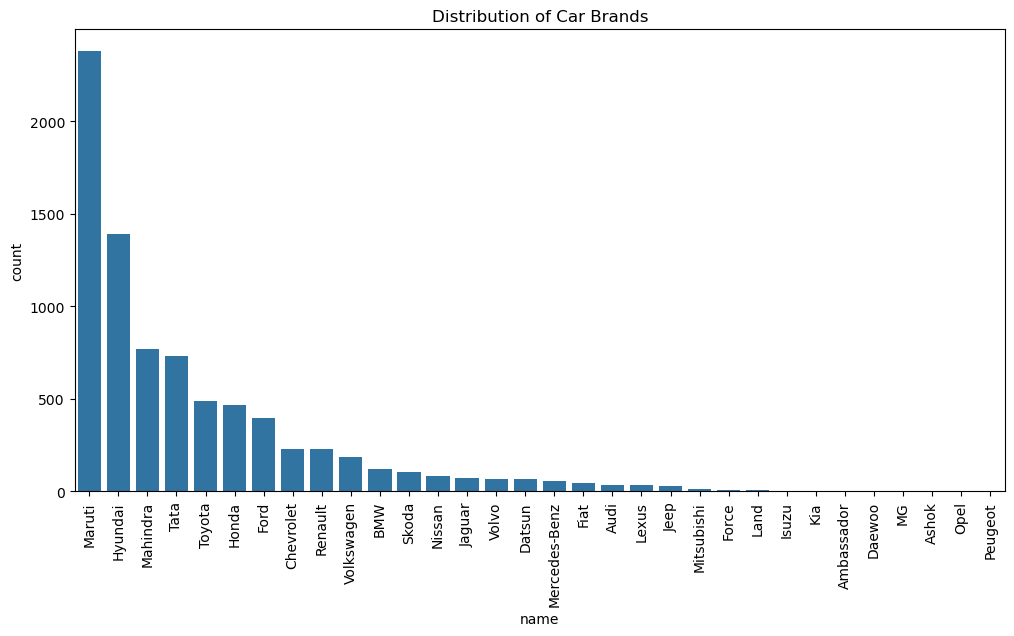

In [26]:
# distribution of car brands
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='name', order=df['name'].value_counts().index)
plt.title("Distribution of Car Brands")
plt.xticks(rotation=90)
plt.show()

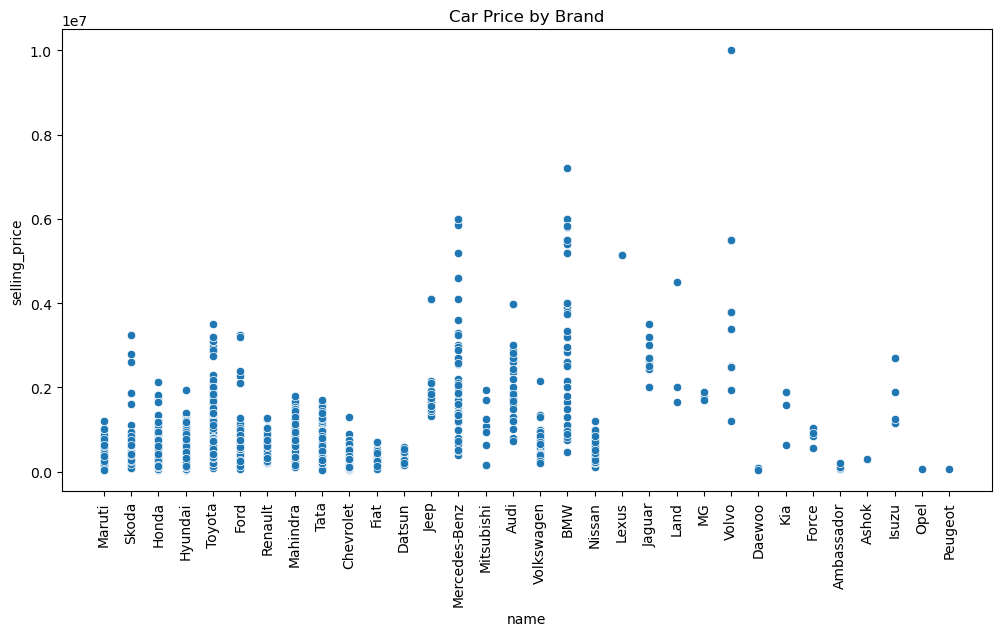

In [27]:
# visualize a scatter plot with car brand and price
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='name', y='selling_price')
plt.title("Car Price by Brand")
plt.xticks(rotation=90)
plt.show()

There are a lot of brand names, one hot encoding is not good for this column

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        8028 non-null   float64
 9   engine         8028 non-null   float64
 10  max_power      8028 non-null   float64
 11  seats          8028 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


In [29]:
# copy before further processing
df_clean = df.copy()

In [30]:
df["fuel"].value_counts()

fuel
Diesel    4401
Petrol    3627
Name: count, dtype: int64

In [31]:
df["seller_type"].value_counts()

seller_type
Individual          6673
Dealer              1119
Trustmark Dealer     236
Name: count, dtype: int64

In [32]:
# one hot encoding for fuel, seller_type, and transmission
df = pd.get_dummies(df, columns=["fuel","seller_type","transmission"], drop_first=True)

In [33]:
df.head(3)

,name,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,Maruti,2014,450000,145500,1,23.40,1248.0,74.00,5.0,False,True,False,True
1,Skoda,2014,370000,120000,2,21.14,1498.0,103.52,5.0,False,True,False,True
2,Honda,2006,158000,140000,3,17.70,1497.0,78.00,5.0,True,True,False,True


### Feature Selection

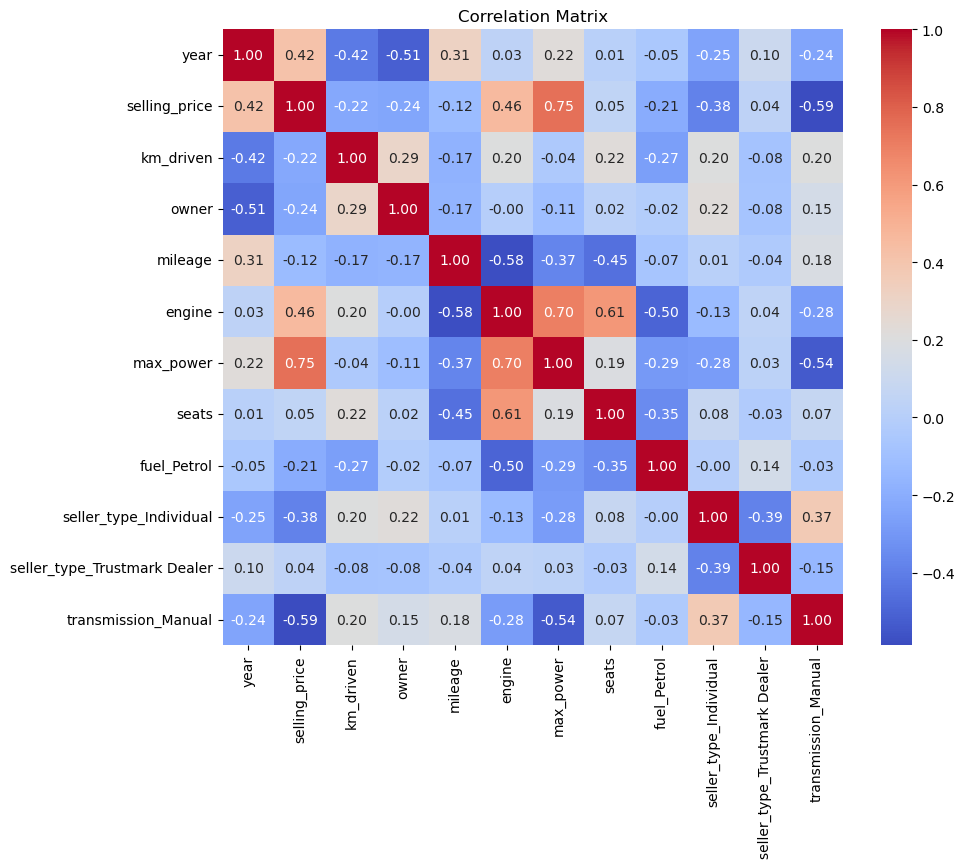

In [34]:
# correlation matrix for only numerical features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Accoring to this correlation matrix, we can observe the following.

max_power → 0.75 (strong, definitely keep it)

engine → 0.46 (moderate, keep it)

year → 0.42 (moderate, keep it)

transmission_Manual → -0.59 (negative correlation: automatics more expensive, keep it)

km_driven → -0.22 (more driven = lower price, weak correlation, but keep it)

owner → -0.24 (also weak but we should keep this as a feature)

mileage → -0.12 (weak, might not matter much)

seats → 0.05 (basically useless)

I chose to keep max_power, engine, year, tranmission_Manual, km_driven, owner and milage. In addition, the brand also affect the price. In our obervation, we sold Maruti cars a lot. Their prices are reasonable and a lot of customers purchase this brand. Therefore I will take name also as a feature. We need to encode that column.


In [35]:
# one hot encoding for name
df = pd.get_dummies(df, columns=["name"], drop_first=True)

In [36]:
df.head(3)

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_Petrol,seller_type_Individual,...,name_Mitsubishi,name_Nissan,name_Opel,name_Peugeot,name_Renault,name_Skoda,name_Tata,name_Toyota,name_Volkswagen,name_Volvo
0,2014,450000,145500,1,23.40,1248.0,74.00,5.0,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2014,370000,120000,2,21.14,1498.0,103.52,5.0,False,True,...,False,False,False,False,False,True,False,False,False,False
2,2006,158000,140000,3,17.70,1497.0,78.00,5.0,True,True,...,False,False,False,False,False,False,False,False,False,False


### Model Selection

The target (selling_price) is numerical. Therefore, this data does not fit classification model. We will split the data set into train set and test set.

In [37]:
# Train-test split
X = df.drop(columns=['selling_price'])
y = df['selling_price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# log transformation for train set
y_train = np.log(y_train)

I want to try the regression first.

In [38]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
yhat = np.exp(yhat)  # reverse log transformation

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  53209250859.19815
r2:  0.9312727616469212


### Cross Validation 

In [39]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [40]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.07147318 -0.07407321 -0.06032767 -0.06532075 -0.06684098]; Mean: -0.06760715768321876
SVR - Score: [-0.55107941 -0.48643796 -0.51412728 -0.53008196 -0.55421632]; Mean: -0.5271885849267592
KNeighbors Regressor - Score: [-0.23221426 -0.23170539 -0.22869923 -0.27015339 -0.23880518]; Mean: -0.2403154893370592
Decision-Tree Regressor - Score: [-0.07837287 -0.07610206 -0.06986723 -0.07919843 -0.07869151]; Mean: -0.0764464196456173
Random-Forest Regressor - Score: [-0.04061579 -0.04678372 -0.04911773 -0.04227334 -0.04841053]; Mean: -0.04544022193218204


In my experiments, the Random Forest Regressor performed the best overall. This is because Random Forest is an ensemble method that combines many decision trees, which allows it to capture complex non-linear relationships between features such as year, engine capacity, and maximum power. It also reduces overfitting compared to a single decision tree and is generally robust to outliers and noise in the dataset. Interestingly, Linear Regression also performed well after applying the log transformation to the target variable, since several features like max_power, engine, and year show near-linear relationships with the selling price. The transformation helped stabilize variance and made the target easier for a linear model to learn.

On the other hand, some algorithms did not perform well. Support Vector Regression (SVR) struggled on this dataset, mainly because it is very sensitive to feature scaling and does not handle high-dimensional one-hot encoded features efficiently without extensive tuning. K-Nearest Neighbors (KNN) also showed weak performance, as it relies on distance-based similarity, which becomes less meaningful when different features are on very different scales or when the dataset contains many categorical variables. Similarly, a single Decision Tree Regressor performed worse than Random Forest because it easily overfits and fails to generalize. In summary, ensemble methods like Random Forest (and potentially Gradient Boosting) are the most effective for this problem, while simpler models such as SVR, KNN, or a single decision tree are less suitable.

### Grid Search for the best parameter

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

Save the model.

In [42]:
import pickle

# save the model to disk
filename = 'model/car-price-prediction.model'
pickle.dump(grid, open(filename, 'wb'))

Save Model With a Single Pipeline 

I did this because I ran into issue of features not found on my local host. The reason is I have one hot encoded but I did not encode the new data. I tried to resolve but I can't. Therefore, I put all into a single machine learning pipeline to do the automation.

In [43]:
import os, joblib, numpy as np, pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score

# --- 0) Your cleaned df is ready (CNG/LPG removed, owner mapped, mileage/engine/max_power numeric, etc.)
# Keep the raw categorical columns (DO NOT pd.get_dummies here)
features = ['name','year','km_driven','owner','mileage','engine','max_power','seats',
            'fuel','seller_type','transmission']
target = 'selling_price'

X = df_clean[features].copy()
y = df_clean[target].copy()

# --- 1) Define categorical vs numeric cols
cat_cols = ['name','fuel','seller_type','transmission']     # 'name' stays full — OHE handles it
num_cols = ['year','km_driven','owner','mileage','engine','max_power','seats']

# --- 2) Preprocessing
cat_pre = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

num_pre = Pipeline([
    ('imp', SimpleImputer(strategy='median'))
])

pre = ColumnTransformer([
    ('cat', cat_pre, cat_cols),
    ('num', num_pre, num_cols)
], remainder='drop')

# --- 3) Base regressor and log-target wrapper
rf = RandomForestRegressor(random_state=1)
# TransformedTargetRegressor will train on log(y) and exp() predictions back to rupees
rf_log = TransformedTargetRegressor(regressor=rf, func=np.log, inverse_func=np.exp)

pipe = Pipeline([
    ('pre', pre),
    ('reg', rf_log)   # NOTE: parameters go through reg__regressor__...
])

# --- 4) Grid search over RF hyperparams (note the double prefix)
param_grid = {
    'reg__regressor__bootstrap': [True],
    'reg__regressor__max_depth': [5, 10, None],
    'reg__regressor__n_estimators': [50, 100, 200]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=kfold,
    n_jobs=-1,
    refit=True,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

# --- 5) Train/validate once, just to report metrics
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)
grid.fit(X_tr, y_tr)  # trains with log-target internally

print("Best params:", grid.best_params_)

# Evaluate on holdout in original rupee scale (already exp()'d by TTR)
y_pred = grid.predict(X_te)
rmse = np.sqrt(mean_squared_error(y_te, y_pred))
r2 = r2_score(y_te, y_pred)
print(f"Holdout RMSE: {rmse:,.0f}")
print(f"Holdout R²:  {r2:.3f}")

# --- 6) Save the WHOLE best pipeline (preprocessing + model)
os.makedirs('app/artifacts', exist_ok=True)
os.makedirs('model', exist_ok=True)

joblib.dump(grid.best_estimator_, 'app/artifacts/car-price-prediction.joblib')
joblib.dump(grid.best_estimator_, 'model/car-price-prediction.joblib')
print("Saved:", 'app/artifacts/car-price-prediction.joblib', 'and', 'model/car-price-prediction.joblib')

Best params: {'reg__regressor__bootstrap': True, 'reg__regressor__max_depth': None, 'reg__regressor__n_estimators': 100}
Holdout RMSE: 204,230
Holdout R²:  0.946
Saved: app/artifacts/car-price-prediction.joblib and model/car-price-prediction.joblib
